Tag 60:
  Translation: [-3.97946251 -2.16521018  4.63209769] meters
  Distance: 6.48 m
Tag 82:
  Translation: [-1.91471198 -1.77865848  3.65864262] meters
  Distance: 4.50 m
Tag 318:
  Translation: [-1.33148309 -0.52010797  2.96881367] meters
  Distance: 3.30 m
Tag 328:
  Translation: [-4.01364338 -2.75967683  5.90262376] meters
  Distance: 7.65 m
Tag 387:
  Translation: [-2.59620458 -0.72340051  3.13410249] meters
  Distance: 4.13 m


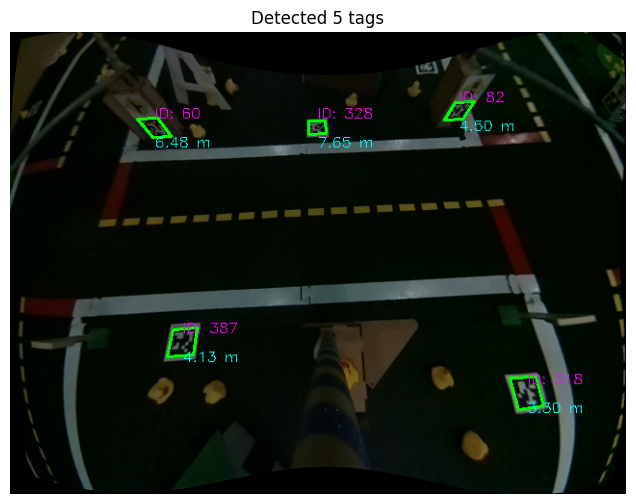

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector

# === CONFIGURATION ===
TAG_SIZE_METERS = 0.10  # Set your actual tag size in meters
CAMERA_PARAMS = (942.5, 942.5, 960, 540)  # fx, fy, cx, cy

# === FUNCTION: Detect AprilTags and estimate pose ===
def detect_apriltags_with_pose(img_bgr, tag_size=TAG_SIZE_METERS, camera_params=CAMERA_PARAMS):
    gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

    detector = Detector(families='tag36h11',
                        nthreads=2,
                        quad_decimate=1.0,
                        quad_sigma=0.0,
                        refine_edges=1,
                        decode_sharpening=0.25,
                        debug=0)

    tags = detector.detect(gray, estimate_tag_pose=True,
                           camera_params=camera_params,
                           tag_size=tag_size)

    for tag in tags:
        tag_id = tag.tag_id
        translation = tag.pose_t  # 3D translation (x, y, z)
        rotation_matrix = tag.pose_R

        print(f"Tag {tag_id}:")
        print(f"  Translation: {translation.ravel()} meters")
        print(f"  Distance: {np.linalg.norm(translation):.2f} m")

        # Draw bounding box
        corners = tag.corners.astype(int)
        for i in range(4):
            pt1 = tuple(corners[i - 1])
            pt2 = tuple(corners[i])
            cv2.line(img_bgr, pt1, pt2, (0, 255, 0), 2)

        # Draw ID and pose info
        center = tag.center.astype(int)
        cv2.putText(img_bgr, f"ID: {tag_id}", (center[0], center[1] - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 255), 1)

        if translation is not None:
            distance_m = np.linalg.norm(translation)
            cv2.putText(img_bgr, f"{distance_m:.2f} m", (center[0], center[1] + 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 1)

    return img_bgr, tags

# === USAGE EXAMPLE ===
img = cv2.imread("test_image.png") 

result_img, tag_detections = detect_apriltags_with_pose(img)

plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"Detected {len(tag_detections)} tags")
plt.show()

